In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
t1 = pd.read_csv("tienda_1.csv")
t2 = pd.read_csv("tienda_2.csv")
t3 = pd.read_csv("tienda_3.csv")
t4 = pd.read_csv("tienda_4.csv")

In [2]:
t1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [53]:
#Calculo de los requerimientos del cliente en la tienda 1
ventas_totales_t1 = t1["Precio"].sum()
ventas_cat_t1 = t1.groupby("Categoría del Producto")["Precio"].sum()
valoracion_t1 = round(t1["Calificación"].mean(),2)
ventas_productos_t1 = t1["Producto"].value_counts()
max_ventas_t1 = t1["Producto"].value_counts().max()
min_ventas_t1 = t1["Producto"].value_counts().min()
mas_vendidos_t1 = ventas_productos_t1[ventas_productos_t1 == max_ventas_t1]
menos_vendidos_t1 = ventas_productos_t1[ventas_productos_t1 == min_ventas_t1]
envio_prom_t1 = round(t1["Costo de envío"].mean(),2)

In [54]:
#Calculo de los requerimientos del cliente en la tienda 2
ventas_totales_t2 = t2["Precio"].sum()
ventas_cat_t2 = t2.groupby("Categoría del Producto")["Precio"].sum()
valoracion_t2 = round(t2["Calificación"].mean(),2)
ventas_productos_t2 = t2["Producto"].value_counts()
max_ventas_t2 = t2["Producto"].value_counts().max()
min_ventas_t2 = t2["Producto"].value_counts().min()
mas_vendidos_t2 = ventas_productos_t2[ventas_productos_t2 == max_ventas_t2]
menos_vendidos_t2 = ventas_productos_t2[ventas_productos_t2 == min_ventas_t2]
envio_prom_t2 = round(t2["Costo de envío"].mean(),2)

In [ ]:
#Calculo de los requerimientos del cliente en la tienda 3
ventas_totales_t3 = t3["Precio"].sum()
ventas_cat_t3 = t3.groupby("Categoría del Producto")["Precio"].sum()
valoracion_t3 = round(t3["Calificación"].mean(),2)
ventas_productos_t3 = t3["Producto"].value_counts()
max_ventas_t3 = t3["Producto"].value_counts().max()
min_ventas_t3 = t3["Producto"].value_counts().min()
mas_vendidos_t3 = ventas_productos_t3[ventas_productos_t3 == max_ventas_t3]
menos_vendidos_t3 = ventas_productos_t3[ventas_productos_t3 == min_ventas_t3]
envio_prom_t3 = round(t3["Costo de envío"].mean(),2)

In [ ]:
#Calculo de los requerimientos del cliente en la tienda 4
ventas_totales_t3 = t3["Precio"].sum()
ventas_cat_t3 = t3.groupby("Categoría del Producto")["Precio"].sum()
valoracion_t3 = round(t3["Calificación"].mean(),2)
ventas_productos_t3 = t3["Producto"].value_counts()
max_ventas_t3 = t3["Producto"].value_counts().max()
min_ventas_t3 = t3["Producto"].value_counts().min()
mas_vendidos_t3 = ventas_productos_t3[ventas_productos_t3 == max_ventas_t3]
menos_vendidos_t3 = ventas_productos_t3[ventas_productos_t3 == min_ventas_t3]
envio_prom_t3 = round(t3["Costo de envío"].mean(),2)

In [3]:
t1['Tienda'] = 'Tienda 1'
t2['Tienda'] = 'Tienda 2'
t3['Tienda'] = 'Tienda 3'
t4['Tienda'] = 'Tienda 4'


In [4]:
a=[t1,t2,t3,t4]
for i in a:
    print(f"Fecha mas antigua y mas reciente de compra en {i['Tienda'][0]}")
    print(i["Fecha de Compra"].min())
    print(i["Fecha de Compra"].max())

Fecha mas antigua y mas reciente de compra en Tienda 1
01/01/2020
31/12/2022
Fecha mas antigua y mas reciente de compra en Tienda 2
01/01/2020
31/12/2022
Fecha mas antigua y mas reciente de compra en Tienda 3
01/01/2020
31/12/2021
Fecha mas antigua y mas reciente de compra en Tienda 4
01/01/2020
31/12/2022


In [5]:
t1["Fecha de Compra"].max()

'31/12/2022'

In [16]:
# Combina los DataFrames
df_completo = pd.concat([t1, t2, t3, t4], ignore_index=True)

In [205]:
df_completo[["Dia", "Mes", "Año"]] = df_completo["Fecha de Compra"].str.split("/", expand=True)
df_completo[["Dia", "Mes", "Año"]] = df_completo[["Día", "Mes", "Año"]].astype(int)  # Convierte a número

In [208]:
df_completo.Dia.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [12]:
df_completo["Fecha de Compra"] = pd.to_datetime(df_completo["Fecha de Compra"], format="%d/%m/%Y")
df_completo["Año"] = df_completo["Fecha de Compra"].dt.to_period('Y')
df_completo['Mes_tmp'] = df_completo['Año'].dt.to_timestamp()  # Convertir a datetime temporalmente
#ventas_por_mes = df_completo.groupby(['Mes', 'Tienda'])['Precio'].sum().reset_index()
#ventas_por_año = df_completo.groupby(['Año', 'Tienda'])['Precio'].sum().reset_index()


In [17]:
df_completo["Fecha de Compra"].max()

'31/12/2022'

In [195]:
df_completo[df_completo["Fecha de Compra"] > "2022-12-31"]

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda,Año,Mes_tmp
23,Kit de bancas,Muebles,293500.0,13800.0,2023-03-06,Camila Rivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 1,2023,2023-01-01
24,Dashboards con Power BI,Libros,33500.0,0.0,2023-02-14,Pedro Gomez,Medellín,5,Tarjeta de crédito,2,6.25184,-75.56359,Tienda 1,2023,2023-01-01
26,Set de ollas,Artículos para el hogar,139300.0,8100.0,2023-03-06,Beatriz Morales,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,2023,2023-01-01
46,Guitarra eléctrica,Instrumentos musicales,679000.0,34300.0,2023-02-24,Juan Fernandez,Inírida,4,Tarjeta de crédito,4,3.86530,-67.92390,Tienda 1,2023,2023-01-01
50,Tablet ABXY,Electrónicos,1130300.0,58400.0,2023-03-08,Mariana Herrera,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 1,2023,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,Tablet ABXY,Electrónicos,1518600.0,79000.0,2023-03-09,Rafael Acosta,Pereira,5,Nequi,1,4.81333,-75.69611,Tienda 4,2023,2023-01-01
9347,Cubertería,Artículos para el hogar,35500.0,2100.0,2023-01-11,Felipe Santos,Cali,3,Tarjeta de crédito,10,3.43722,-76.52250,Tienda 4,2023,2023-01-01
9356,Sofá reclinable,Muebles,616700.0,33500.0,2023-01-27,Pedro Gomez,Santa Marta,5,Tarjeta de crédito,3,11.24079,-74.19904,Tienda 4,2023,2023-01-01
9397,Asistente virtual,Electrónicos,260100.0,12000.0,2023-03-13,Felipe Santos,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 4,2023,2023-01-01


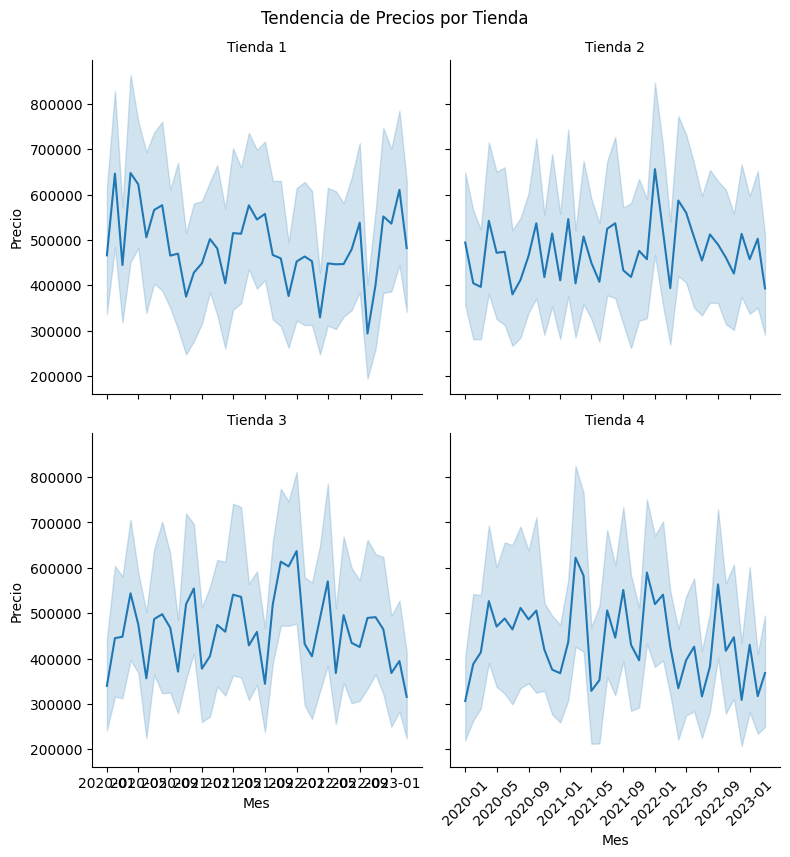

In [115]:

g = sns.FacetGrid(df_completo, col="Tienda", col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.lineplot, "Mes_tmp", "Precio")
g.set_titles("{col_name}")
g.set_axis_labels("Mes", "Precio")
g.fig.suptitle("Tendencia de Precios por Tienda", y=1.02)
plt.xticks(rotation=45)
plt.show()

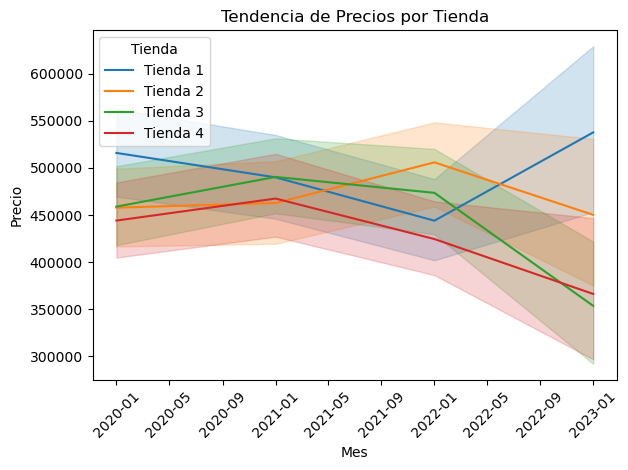

In [15]:

sns.lineplot(x='Mes_tmp', y='Precio', hue='Tienda', data=df_completo)
plt.title("Tendencia de Precios por Tienda")
plt.xlabel("Mes")
plt.ylabel("Precio")

# Ajustar las etiquetas del eje X para que se muestren en intervalos regulares
plt.xticks(rotation=45)  # Rotar las etiquetas para mejorar la legibilidad
plt.legend(title="Tienda")
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()